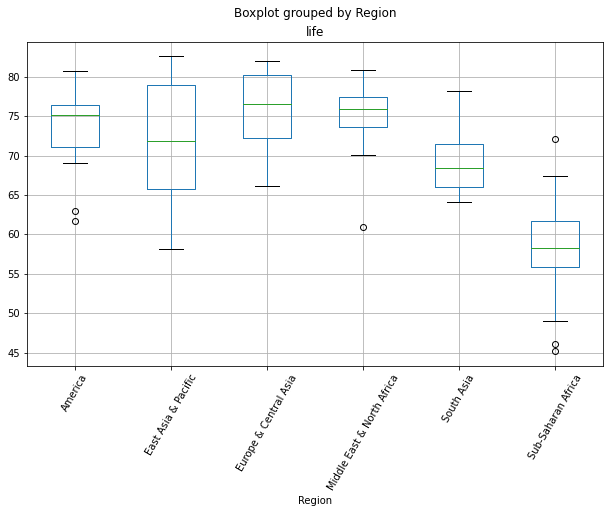

In [1]:
#Exploring categorical features

import matplotlib.pyplot as plt

#The Gapminder dataset that you worked with in previous chapters also contained a categorical 'Region' feature, which we
#dropped in previous exercises since you did not have the tools to deal with it. Now however, you do, so we have added it
#back in!

#Your job in this exercise is to explore this feature. Boxplots are particularly useful for visualizing categorical
#features such as this.

# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('datasets/gapminder_2008_region.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60, figsize=(10,6))

# Show the plot
plt.show()

In [2]:
#NOTE: Exploratory data analysis should always be the precursor to model building.

In [3]:
#Creating dummy variables

#As Andy discussed in the video, scikit-learn does not accept non-numerical features. You saw in the previous exercise that
#the 'Region' feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa
#has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy,
#it would be preferable to retain the 'Region' feature. To do this, you need to binarize it by creating dummy variables,
#which is what you will do in this exercise.

# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns, '\n')

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object') 

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [4]:
#NOTE: Now that you have created the dummy variables, you can use the 'Region' feature to predict life expectancy

In [5]:
#Regression with categorical features

X = df_region.drop('life', axis=1).values
y = df_region['life'].values

#Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here,
#you'll use ridge regression to perform 5-fold cross-validation.

#The feature array X and target variable array y have been pre-loaded.

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


In [6]:
#NOTE: You now know how to build models using data that includes categorical features.

In [7]:
#Dropping missing data

import pandas as pd
import numpy as np
df = pd.read_csv('datasets/votes_us_house_representatives_congressmen_with_nan.csv')

#The voting dataset from Chapter 1 contained a bunch of missing values that we dealt with for you behind the scenes. Now,
#it's time for you to take care of these yourself!

#The unprocessed dataset has been loaded into a DataFrame df. Explore it in the IPython Shell with the .head() method. You
#will see that there are certain data points labeled with a '?'. These denote missing values. As you saw in the video,
#different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world
#data can be very messy! If you're lucky, the missing values will already be encoded as NaN. We use NaN because it is an
#efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such
#as .dropna() and .fillna(), as well as scikit-learn's Imputation transformer Imputer().

#In this exercise, your job is to convert the '?'s to NaNs, and then drop the rows that contain them from the DataFrame.

# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum(), '\n')

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64 

Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


In [8]:
#NOTE: When many values in your dataset are missing, if you drop them, you may end up throwing away valuable information
#along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is
#useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the
#missing value is in.

In [9]:
#Imputing missing data in a ML Pipeline I

#As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a
#classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as
#the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline.
#Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby
#simplify your workflow.

#You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a
#classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You
#will now be introduced to a fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it works
#under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously,
#in that it has the same .fit() and .predict() methods as before.

# Import the Imputer module
#from sklearn.preprocessing import Imputer #Deprecated
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
#imp = SimpleImputer(missing_values='NaN', strategy='most_frequent')
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp), ('SVM', clf)]

In [10]:
#NOTE: Having set up the pipeline steps, you can now use it for classification.

In [11]:
#Imputing missing data in a ML Pipeline II

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
df = pd.read_csv('datasets/votes_us_house_representatives_congressmen_with_nan.csv')
df[df == '?'] = np.nan
X = df.drop('party', axis=1)
y = df['party']

#Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a
#Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You
#can use the .fit() and .predict() methods on pipelines just as you did with your classifiers and regressors!

#Practice this for yourself now and generate a classification report of your predictions. The steps of the pipeline have
#been set up for you, and the feature array X and target variable array y have been pre-loaded. Additionally,
#train_test_split and classification_report have been imported from sklearn.model_selection and sklearn.metrics
#respectively.

# Import necessary modules
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
#steps = [('imputation', SimpleImputer(missing_values='NaN', strategy='most_frequent')),
#         ('SVM', SVC())]
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
         ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.98      0.96      0.97        85
  republican       0.94      0.96      0.95        46

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131



In [12]:
#NOTE: Your pipeline has performed imputation as well as classification!

In [13]:
#Centering and scaling your data

import pandas as pd
import numpy as np
df = pd.read_csv('datasets/white_wine_quality.csv')
X = df.drop('quality', axis=1).values

#In the video, Hugo demonstrated how significantly the performance of a model can improve if the features are scaled. Note
#that this is not always the case: In the Congressional voting records dataset, for example, all of the features are
#binary. In such a situation, scaling will have minimal impact.

#You will now explore scaling for yourself on a new dataset - White Wine Quality! Hugo used the Red Wine Quality dataset in
#the video. We have used the 'quality' feature of the wine to create a binary target variable: If 'quality' is less than 5,
#the target variable is 1, and otherwise, it is 0.

#The DataFrame has been pre-loaded as df, along with the feature and target variable arrays X and y. Explore it in the
#IPython Shell. Notice how some features seem to have different units of measurement. 'density', for instance, takes values
#between 0.98 and 1.04, while 'total sulfur dioxide' ranges from 9 to 440. As a result, it may be worth scaling the
#features here. Your job in this exercise is to scale the features and compute the mean and standard deviation of the
#unscaled features compared to the scaled features.

# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)), '\n')

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571 

Mean of Scaled Features: 2.7452128118308485e-15
Standard Deviation of Scaled Features: 0.9999999999999999


In [14]:
#NOTE: Notice the difference in the mean and standard deviation of the scaled features compared to the unscaled features.

In [15]:
#Centering and scaling in a pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('datasets/white_wine_quality.csv')
X = df.drop('quality', axis=1).values
y = df['quality'].values
y[y <= 5] = True
y[y > 5] = False

#With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling
#the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part
#of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data
#has been provided.

#The feature array and target variable array have been pre-loaded as X and y. Additionally, KNeighborsClassifier and
#train_test_split have been imported from sklearn.neighbors and sklearn.model_selection, respectively.

# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.7700680272108843
Accuracy without Scaling: 0.6979591836734694


In [16]:
#NOTE:  It looks like scaling has significantly improved model performance!

In [17]:
#Bringing it all together I: Pipeline for classification

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
df = pd.read_csv('datasets/white_wine_quality.csv')
X = df.drop('quality', axis=1).values
y = df['quality'].values
y[y <= 5] = True
y[y > 5] = False

#It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this
#exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

#You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you
#will tune are C and gamma. C controls the regularization strength. It is analogous to the  you tuned for logistic
#regression in Chapter 3, while gamma controls the kernel coefficient: Do not worry about this now as it is beyond the
#scope of this course.

#The following modules and functions have been pre-loaded: Pipeline, SVC, train_test_split, GridSearchCV,
#classification_report, accuracy_score. The feature and target variable arrays X and y have also been pre-loaded.

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)), '\n')
print(classification_report(y_test, y_pred), '\n')
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7795918367346939 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       662
           1       0.67      0.63      0.65       318

    accuracy                           0.78       980
   macro avg       0.75      0.74      0.74       980
weighted avg       0.78      0.78      0.78       980
 

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


In [18]:
#Bringing it all together II: Pipeline for regression

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
df = pd.read_csv('datasets/gapminder_2008_region.csv')
df = df.drop('Region', axis=1)
X = df.drop('life', axis=1).values
y = df['life'].values

#For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that
#we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself!

#Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the
#Gapminder data. You will then tune the l1_ratio of your ElasticNet using GridSearchCV.

#All the necessary modules have been imported, and the feature and target variable arrays have been pre-loaded as X and y.

# Setup the pipeline steps: steps
#steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
#         ('scaler', StandardScaler()),
#         ('elasticnet', ElasticNet())]
#steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
#         ('scaler', StandardScaler()),
#         ('elasticnet', ElasticNet(max_iter=1000, tol=0.0001))] #Default parameters
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet(max_iter=1000000, tol=0.0001))]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio' : np.linspace(0, 1, 30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888216
